# Feed Forward Networks
A Feed Forward Neural Network (FFNN) is the simplest type of artificial neural network. Below is an implementation in PyTorch.

In [1]:
import torch
import torch.nn as nn

class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

input_size, hidden_size1, hidden_size2, output_size = 1, 8, 6, 1
model = FeedForwardNN(input_size, hidden_size1, hidden_size2, output_size)
print(model)

FeedForwardNN(
  (fc1): Linear(in_features=1, out_features=8, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=8, out_features=6, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=6, out_features=1, bias=True)
)


## Function Approximation using FFNN

Epoch 500, Loss: 0.000031
Epoch 1000, Loss: 0.000015
Epoch 1500, Loss: 0.000013
Epoch 2000, Loss: 0.000013


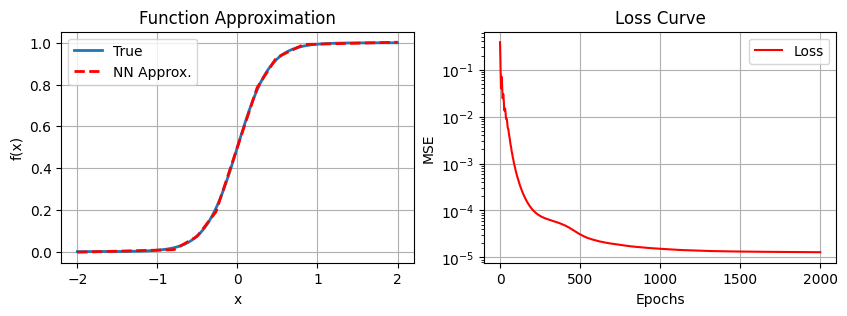

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42); np.random.seed(42)
x = np.linspace(-2, 2, 500)
y = 1 / (1 + np.exp(-5 * x))
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

class DeepFFNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1, self.fc2, self.fc3 = nn.Linear(1, 8), nn.Linear(8, 6), nn.Linear(6, 1)
    def forward(self, x): return self.fc3(torch.relu(self.fc2(torch.relu(self.fc1(x)))))

model = DeepFFNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

loss_history = []
for epoch in range(2000):
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    if (epoch + 1) % 500 == 0: print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")

with torch.no_grad(): y_pred_np = model(x_tensor).numpy()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].plot(x, y, label="True", linewidth=2)
axes[0].plot(x, y_pred_np, "r--", label="NN Approx.", linewidth=2)
axes[0].set(title="Function Approximation", xlabel="x", ylabel="f(x)"); axes[0].legend(); axes[0].grid()
axes[1].semilogy(loss_history, "r", label="Loss")
axes[1].set(title="Loss Curve", xlabel="Epochs", ylabel="MSE"); axes[1].legend(); axes[1].grid()
plt.savefig("deep_nn_results.png")
plt.show()